In [119]:
from binance.client import Client

# Init Test API key
api_key = ''
api_secret = ''

client = Client(api_key, api_secret)
client.API_URL = 'https://testnet.binance.vision/api'

# get balances for all assets & some account information
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1635362772899,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [120]:
# get balance for a specific asset only (BTC)
client.get_asset_balance(asset='BTC')

{'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}

In [121]:
# get latest price from Binance API
btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
btc_price


{'symbol': 'BTCUSDT', 'price': '61251.88000000'}

In [122]:
# valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

# get timestamp of earliest date data is available
timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1h')
timestamp

1633064400000

In [123]:
from datetime import datetime
import pandas as pd
# request historical candle (or klines) data
bars = client.get_historical_klines('BTCUSDT', '1h', timestamp, limit=1000)

In [124]:
head = bars[0]
print("Open time: ", pd.to_datetime(head[0], unit = 'ms'))
print("Open: ", head[1])
print("High: ", head[2])
print("Low: ", head[3])
print("Close: ", head[4])
print("Volume: ", head[5])
print("Close time: ", pd.to_datetime(head[6], unit = 'ms'))
print("Number of trades: ", head[7])
print("Taker buy base asset volume: ", head[8])
print("Taker buy quote asset volume: ", head[9])
print("Can be ignored: ", head[10])
print("Can be ignored: ", head[11])

Open time:  2021-10-01 05:00:00
Open:  43811.20000000
High:  43854.70000000
Low:  43292.96000000
Close:  43848.66000000
Volume:  2.25637400
Close time:  2021-10-01 05:59:59.999000
Number of trades:  98853.26501843
Taker buy base asset volume:  152
Taker buy quote asset volume:  1.12928000
Can be ignored:  49452.01427264
Can be ignored:  0


In [125]:
# delete unwanted data - just keep date, open, high, low, close, volume
for line in bars:
	del line[6:]

In [126]:
import pandas as pd
# Create a Pandas DataFrame and export to CSV
btc_df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close','volume'])
btc_df.set_index('date', inplace=True)
btc_df.head()

,open,high,low,close,volume
date,,,,,
1633064400000,43811.20000000,43854.70000000,43292.96000000,43848.66000000,2.25637400
1633068000000,43850.33000000,44036.24000000,39977.15000000,43995.10000000,14.54799700
1633071600000,43993.98000000,70000.00000000,9000.00000000,44789.52000000,72.53373300
1633075200000,44789.52000000,49356.24000000,40782.46000000,45116.48000000,98.34997900
1633078800000,44945.81000000,50000.00000000,42270.20000000,44886.12000000,98.34620100


In [127]:
# export DataFrame to csv
btc_df.to_csv('btc_bars3.csv')

In [128]:
# load DataFrame
btc_df = pd.read_csv('btc_bars3.csv')
btc_df.set_index('date', inplace=True)
btc_df.index = pd.to_datetime(btc_df.index, unit='ms')
btc_df

,open,high,low,close,volume
date,,,,,
2021-10-01 05:00:00,43811.20,43854.70,43292.96,43848.66,2.256374
2021-10-01 06:00:00,43850.33,44036.24,39977.15,43995.10,14.547997
2021-10-01 07:00:00,43993.98,70000.00,9000.00,44789.52,72.533733
2021-10-01 08:00:00,44789.52,49356.24,40782.46,45116.48,98.349979
2021-10-01 09:00:00,44945.81,50000.00,42270.20,44886.12,98.346201
...,...,...,...,...,...
2021-10-29 09:00:00,60950.01,61350.02,60534.83,60858.00,21.832843
2021-10-29 10:00:00,60858.01,61537.99,59216.54,61033.24,22.201597
2021-10-29 11:00:00,61029.56,61486.70,60008.70,60935.23,17.196916


In [129]:
# calculate 20 moving average using Pandas
btc_df['20sma'] = btc_df.close.rolling(20).mean()
btc_df.tail(10)

,open,high,low,close,volume,20sma
date,,,,,,
2021-10-29 04:00:00,61642.98,61695.34,54000.00,61513.11,17.099795,61149.7420
2021-10-29 05:00:00,61516.73,122820.00,58758.62,60991.44,20.923821,61147.1395
2021-10-29 06:00:00,60989.08,61425.38,54501.00,61371.94,18.639153,61164.2630
2021-10-29 07:00:00,61365.30,61515.42,48297.89,60604.15,25.624096,61146.5265
2021-10-29 08:00:00,60604.15,61202.76,36902.05,60952.03,32.879824,61139.3640
2021-10-29 09:00:00,60950.01,61350.02,60534.83,60858.00,21.832843,61102.3155
2021-10-29 10:00:00,60858.01,61537.99,59216.54,61033.24,22.201597,61076.7645
2021-10-29 11:00:00,61029.56,61486.70,60008.70,60935.23,17.196916,61066.3275
2021-10-29 12:00:00,60940.90,61434.26,60575.80,60973.61,18.537624,61056.1550


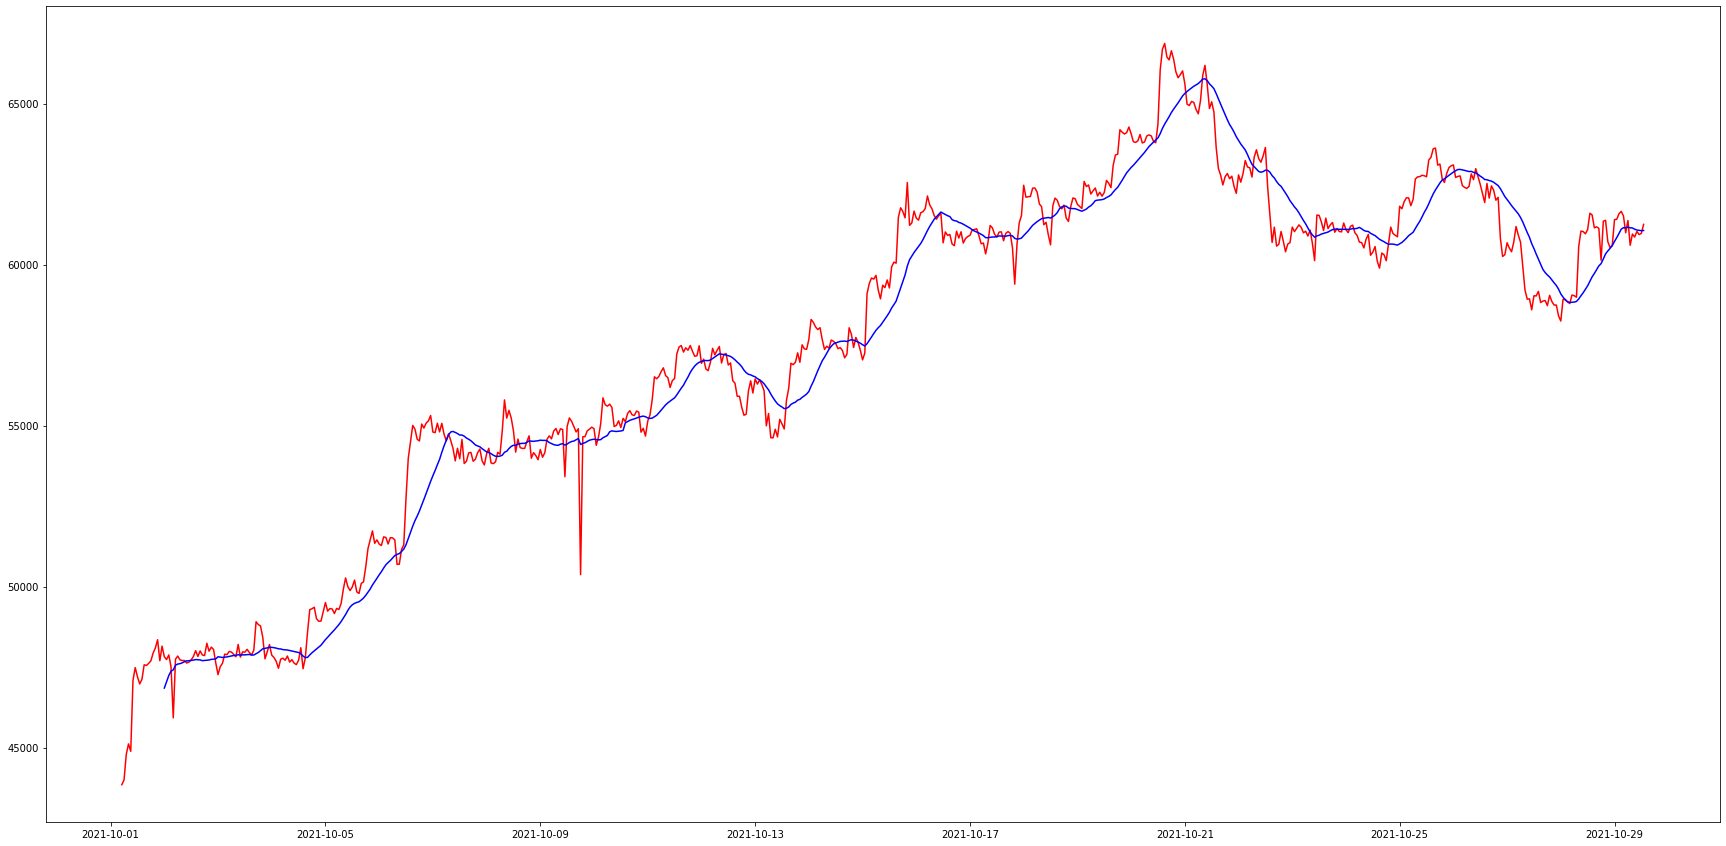

In [130]:
import matplotlib.pyplot as plt

x = btc_df.index
y1 = btc_df['close']
y2 = btc_df['20sma']

plt.plot(x, y1, label = "BTC/USD", c='red')
plt.plot(x, y2, label = "SMA 20d", c='blue')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [131]:
from stockstats import StockDataFrame as Sdf
stock = Sdf.retype(pd.read_csv('btc_bars3.csv'))


### KDJ



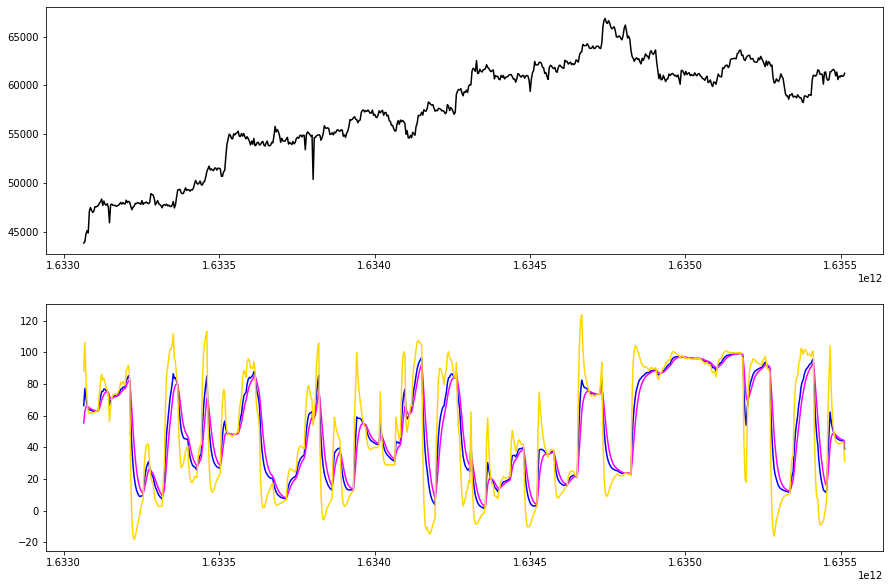

In [132]:
x = stock.index
y = stock['close']

y1 = stock['kdjk_12']
y2 = stock['kdjd_12']
y3 = stock['kdjj_12']

fig, axs = plt.subplots(2)
axs[0].plot(x, y, label = "Price", c='black')
axs[1].plot(x, y1, label = "K", c='blue')
axs[1].plot(x, y2, label = "D", c='magenta')
axs[1].plot(x, y3, label = "J", c='gold')
plt.rcParams['figure.figsize'] = [30, 15]
plt.show()